In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay

In [2]:
tss = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_clusterall.csv")
tss_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_clusterall_cv.csv")
tss1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster1.csv")
tss2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster2.csv")
tss3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cluster3.csv")

In [3]:
csi = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_clusterall.csv")
csi_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_clusterall_cv.csv")
csi1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster1.csv")
csi2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster2.csv")
csi3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cluster3.csv")

In [4]:
auc = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_clusterall.csv")
auc_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_clusterall_cv.csv")
auc1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_cluster1.csv")
auc2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_cluster2.csv")
auc3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_cluster3.csv")

In [5]:
tss_thresh = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_clusterall.csv")
tss_thresh_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_clusterall_cv.csv")
tss_thresh1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster1.csv")
tss_thresh2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster2.csv")
tss_thresh3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_thresh_era5_cluster3.csv")

In [6]:
csi_thresh = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_clusterall.csv")
csi_thresh_cv = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_clusterall_cv.csv")
csi_thresh1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster1.csv")
csi_thresh2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster2.csv")
csi_thresh3 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_thresh_era5_cluster3.csv")

In [7]:
tss = tss.merge(tss_cv.rename(columns={"bdsd":"bdsd_cv"})["bdsd_cv"],right_index=True,left_index=True)
csi = csi.merge(csi_cv.rename(columns={"bdsd":"bdsd_cv"})["bdsd_cv"],right_index=True,left_index=True)
auc = auc.merge(auc_cv.rename(columns={"bdsd":"bdsd_cv"})["bdsd_cv"],right_index=True,left_index=True)

In [16]:
#Create a list of indices for the paper (of around 50)

ind_list = [\
            #Wind indices
            "Umean06","Umean01","U10","wg10_2","s06","ebwd","Umeanwindinf","srhe_left","srh06_left",\
            #Downburst indices
            "dmi","lr_subcloud","lr_freezing","lr03","lr13","wmsi_ml","bdsd","convgust_wet","convgust_dry",\
            "gustex","dmgwind","dmgwind_fixed","dcape","wmpi","windex","ddraft_temp","te_diff","tei","wndg",\
            #Storm mode
            "dcp","scp","scp_fixed",\
            #Severe storm indices
            "sherb","eff_sherb","sweat","sbcape*s06","mucape*s06","mlcape*s06","effcape*s06","t_totals","k_index",\
            #Thermo indices
            "eff_cape","eff_lcl","sb_lcl","ml_cape","ml_lcl","mu_cape","mu_lcl","qmean01","qmean06","rhminsubcloud"\
           ]

renames = {
         'Umean06': "Umean06",
         'Umean01': "Umean01",
         'U10': "U10",
         'wg10_2': "WindGust10",
         's06': "S06",
         'ebwd': "EBWD",
         'Umeanwindinf': "Umeanwindinf",
         'srhe_left': "SRHE",
         'srh06_left': "SRH06",
         'dmi': "DMI",
         'lr_subcloud': "LR-subcloud",
         'lr_freezing': "LR-freezing",
         'lr03': "LR03",
         'lr13': "LR13",
         'wmsi_ml': "WMSI",
         'bdsd': "BDSD",
         'bdsd_cv': "BDSD (CV)",
         'hmi': "HMI",
         'convgust_wet': "ConvGust\n(wet)",
         'convgust_dry': "ConvGust\n(dry)",
         'gustex': "GUSTEX",
         'dmgwind': "DmgWind",
         'dmgwind_fixed': "DmgWind\n(fixed)",
         'dcape': "DCAPE",
         'wmpi': "WMPI",
         'windex': "WINDEX",
         'ddraft_temp': "DowndraftTemp",
         'te_diff': "ThetaeDiff",
         'tei': "TEI",
         'wndg': "WNDG",
         'dcp': "DCP",
         'scp': "SCP",
         'scp_fixed': "SCP (fixed)",
         'sherb': "SHERB",
         'eff_sherb': "SHERBE",
         'sweat': "SWEAT",
         'mucape*s06': "MUCS6",
         'mlcape*s06': "MLCS6",
         'effcape*s06': "EffCS6",
         't_totals': "T-Totals",
         'k_index': "K-Index",
         'eff_cape': "Eff-CAPE",
         'eff_lcl': "Eff-LCL",
         'ml_cape': "MLCAPE",
         'ml_lcl': "ML-LCL",
         'mu_cape': "MUCAPE",
         'mu_lcl': "MU-LCL",
         'qmean01': "Qmean01",
         'qmean06': "Qmean06"}

In [18]:
len(np.sort(ind_list+["bdsd_cv"]))

48

In [9]:
tss = tss[ind_list+["bdsd_cv"]]
tss1 = tss1[ind_list]
tss2 = tss2[ind_list]
tss3 = tss3[ind_list]

auc = auc[ind_list+["bdsd_cv"]]
auc1 = auc1[ind_list]
auc2 = auc2[ind_list]
auc3 = auc3[ind_list]

In [10]:
# renames = {"ship":"SHIP", "k_index":"K-index", "ml_cape":"MLCAPE", "srhe_left":"SRHE", \
#          "ml_el":"MLEL", "mu_cape":"MUCAPE", "eff_cape":"Eff-CAPE", "sb_cape":"SBCAPE", "eff_lcl":"Eff-LCL",\
#          "wmsi_ml":"WMSI", "dcp":"DCP", "mlcape*s06":"MLCS6", "eff_sherb":"SHERBE", "ebwd":"EBWD",\
#          "mu_el":"MUEL", "eff_el":"Eff-EL", "sb_el":"SBEL", "mucape*s06":"MUCS6", "sweat":"SWEAT",\
#          "Umean800_600":"Umean800-600", "Ust_left":"Ust", "sherb":"SHERB", "t_totals":"T-totals", \
#          "scp_fixed":"SCP (fixed)","scp":"SCP", "dmgwind_fixed":"DmgWind-Fixed", "lr36":"LR36", "lr_freezing":"LR-Freezing", \
#          "srh06_left":"SRH06", "s06":"S06", "wg10":"WindGust10", "srh01_left":"SRH01",\
#          "qmeansubcloud":"Qmeansubcloud", "s010":"S010", "effcape*s06":"Eff-CS6", "mmp":"MMP",\
#          "sbcape*s06":"SBCS6", "q_melting":"Qmelting", "gustex":"GUSTEX", "pwat":"PWAT",\
#          "qmean06":"Qmean06","q3":"Q3","qmean03":"Qmean03","s03":"S03",\
#          "convgust_dry":"ConvGust-Dry","cp":"ConvPrcp","dpd700":"DPD700","Umeanwindinf":"Umeanwindinf",\
#          "v_totals":"V-Totals","c_totals":"C-Totals","qmean01":"Qmean01","mhgt":"MHGT",\
#          "wbz":"WBZ","sfc_thetae":"Sfc-ThetaE","q1":"Q1","te_diff":"TED","rhmin13":"RHMin03","Uwindinf":"Uwindinf",\
#         "Umean06":"Umean06","U3":"U3","U500":"U500","U6":"U6","Umean03":"Umean03","U1":"U1",\
#           "bdsd":"BDSD","bdsd_cv":"BDSD CV","mod_cape*s06":"CS6","mod_cape":"CAPE"}



p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

def plot(data, ax, color, y1, renames, ylabel, letter, y2=0.8, yticks=None):
    
    if yticks is None:
        yticks=np.arange(y1,y2+0.1,0.1)
        
    sns.violinplot(data=data.rename(columns=renames),color=color)
    plt.gca().tick_params(axis="x",labelrotation=45)
    plt.yticks(yticks)    
    plt.ylim([y1,y2])
    plt.gca().tick_params(labelsize=15)
    plt.ylabel(ylabel,size=22)
    plt.xlabel("")
    plt.gca().grid(axis="y",ls="--")
    ax.text(0.05,0.1,letter+")",transform=ax.transAxes,size=18)
    
# plt.figure(figsize=[22,18])    
    
# col=3

# sort = tss.mean(axis=0).sort_values(ascending=False).index.values[0:10]
# sort1 = tss1.mean(axis=0).sort_values(ascending=False).index.values[0:10]
# sort2 = tss2.mean(axis=0).sort_values(ascending=False).index.values[0:10]
# sort3 = tss3.mean(axis=0).sort_values(ascending=False).index.values[0:10]

# plot(tss.loc[:,sort], plt.subplot(4,col,1),(0.5,0.5,0.5),0.4,renames,"Optimal TSS","a",y2=0.95)
# plot(tss1.loc[:,sort1], plt.subplot(4,col,4),p[0],0.4,renames,"Optimal TSS","c",y2=0.95)
# plot(tss2.loc[:,sort2], plt.subplot(4,col,7),p[1],0.4,renames,"Optimal TSS","e",y2=0.95)
# plot(tss3.loc[:,sort3], plt.subplot(4,col,10),p[2],0.4,renames,"Optimal TSS","g",y2=0.95)

# plot(csi.loc[:,sort], plt.subplot(4,col,2),(0.5,0.5,0.5),0.58,renames,"Optimal CSI","b",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi1.loc[:,sort1], plt.subplot(4,col,5),p[0],0.58,renames,"Optimal CSI","d",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi2.loc[:,sort2], plt.subplot(4,col,8),p[1],0.58,renames,"Optimal CSI","f",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi3.loc[:,sort3], plt.subplot(4,col,11),p[2],0.58,renames,"Optimal CSI","h",yticks=np.arange(0.6,1,0.05),y2=0.95)

# plot(auc.loc[:,sort], plt.subplot(4,col,3),(0.5,0.5,0.5),0.7,renames,"AUC","a",yticks=np.arange(0.65,1,0.05),y2=1)
# plot(auc1.loc[:,sort1], plt.subplot(4,col,6),p[0],0.7,renames,"AUC","a",yticks=np.arange(0.65,1,0.05),y2=1)
# plot(auc2.loc[:,sort2], plt.subplot(4,col,9),p[1],0.7,renames,"AUC","a",yticks=np.arange(0.65,1,0.05),y2=1)
# plot(auc3.loc[:,sort3], plt.subplot(4,col,12),p[2],0.7,renames,"AUC","a",yticks=np.arange(0.65,1,0.05),y2=1)

# plt.subplots_adjust(hspace=0.7)

#plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/skill.jpeg",bbox_inches="tight",dpi=500)

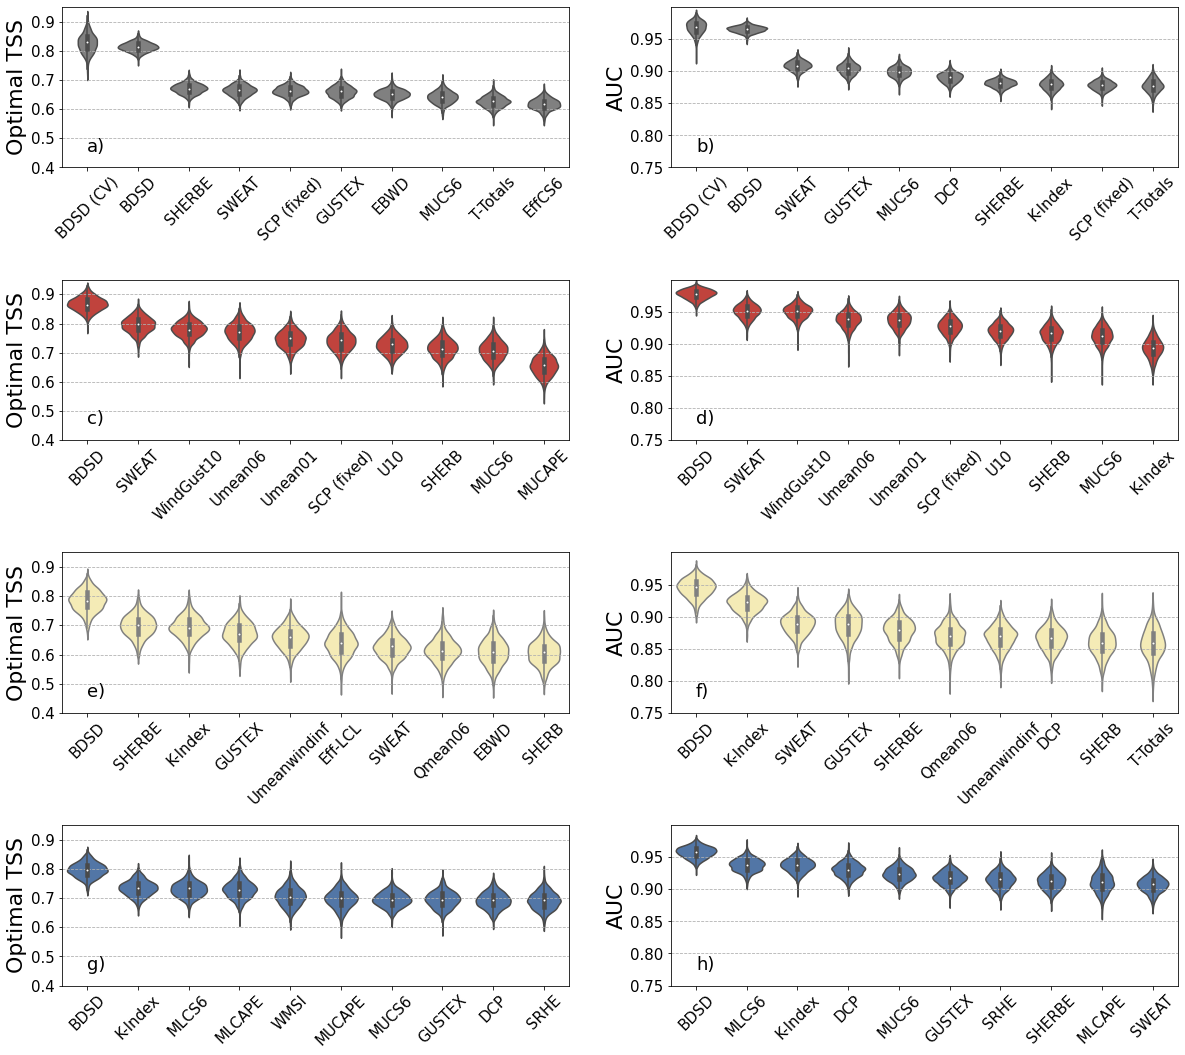

In [11]:
plt.figure(figsize=[20,18])    
    
col=2

plot(tss.loc[:,tss.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,1),(0.5,0.5,0.5),0.4,renames,"Optimal TSS","a",y2=0.95)
plot(tss1.loc[:,tss1.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,3),p[0],0.4,renames,"Optimal TSS","c",y2=0.95)
plot(tss2.loc[:,tss2.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,5),p[1],0.4,renames,"Optimal TSS","e",y2=0.95)
plot(tss3.loc[:,tss3.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,7),p[2],0.4,renames,"Optimal TSS","g",y2=0.95)

# plot(csi.loc[:,csi.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,2),(0.5,0.5,0.5),0.58,renames,"Optimal CSI","b",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi1.loc[:,csi1.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,5),p[0],0.58,renames,"Optimal CSI","d",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi2.loc[:,csi2.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,8),p[1],0.58,renames,"Optimal CSI","f",yticks=np.arange(0.6,1,0.05),y2=0.95)
# plot(csi3.loc[:,csi3.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,11),p[2],0.58,renames,"Optimal CSI","h",yticks=np.arange(0.6,1,0.05),y2=0.95)

plot(auc.loc[:,auc.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,2),(0.5,0.5,0.5),0.75,renames,"AUC","b",yticks=np.arange(0.65,1,0.05),y2=1)
plot(auc1.loc[:,auc1.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,4),p[0],0.75,renames,"AUC","d",yticks=np.arange(0.65,1,0.05),y2=1)
plot(auc2.loc[:,auc2.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,6),p[1],0.75,renames,"AUC","f",yticks=np.arange(0.65,1,0.05),y2=1)
plot(auc3.loc[:,auc3.mean(axis=0).sort_values(ascending=False).index.values[0:10]], plt.subplot(4,col,8),p[2],0.75,renames,"AUC","h",yticks=np.arange(0.65,1,0.05),y2=1)

plt.subplots_adjust(hspace=0.7)

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/skill.jpeg",bbox_inches="tight",dpi=500)

In [17]:
auc[["bdsd","convgust_wet","convgust_dry","gustex","lr03"]].mean(axis=0).sort_values().round(3)

convgust_wet    0.752
convgust_dry    0.822
lr03            0.842
gustex          0.904
bdsd            0.966
dtype: float64